# Assignment 3 - Supervised Learning: model training and evaluation 

## *YOUR FULL NAME HERE* 
Netid: ejr41

*Names of students you worked with on this assignment*: Song Young Oh, Wafiakmal Mitah

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

# Learning Objectives: 
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Understand the inner workings of logistic regression and how linear models for classification can be developed.
3. Gain practice in implementing machine learning algorithms from the most basic building blocks to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
5. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
6. Apply regularization to linear models to improve model generalization performance

# 1
## Classification using logistic regression: build it from the ground up 
**[60 points]**

This exercise will walk you through the full life-cycle of a supervised machine learning classification problem. Classification problem consists of two features/predictors (e.g. petal width and petal length) and your goal is to predict one of two possible classes (class 0 or class 1). You will build, train, and evaluate the performance of a logistic regression classifier on the data provided. Before you begin any modeling, you'll load and explore your data in Part I to familiarize yourself with it - and check for any missing or erroneous data. Then, in Part II, we will review an appropriate hypothesis set of functions to fit to the data: in this case, logistic regression. In Part III, we will derive an appropriate cost function for the data (spoiler alert: it's cross-entropy) as well as the gradient descent update equation that will allow you to optimize that cost function to identify the parameters that minimize the cost for the training data. In Part IV, all the pieces come together and you will implement your logistic regression model class including methods for fitting the data using gradient descent. Using that model you'll test it out and plot learning curves to verify the model learns as you train it and to identify and appropriate learning rate hyperparameter. Lastly, in Part V you will apply the model you designed, implemented, and verified to your actual data and evaluate and visualize its generalization performance as compared to a KNN algorithm. **When complete, you will have accomplished learning objectives 1-5 above!**

### I. Load, prepare, and plot your data
You are given some data for which you are tasked with constructing a classifier. The first step when facing any machine learning project: look at your data!

**(a)** Load the data. 
- In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.
- Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent.  
- Plot the training data by class. 
- Comment on the data: do the data appear separable? May logistic regression be a good choice for these data? Why or why not?



**(b)** Do the data require any preprocessing due to missing values, scale differences (e.g. different ranges of values), etc.? If so, how did you handle these issues?

Next, we walk through our key steps for model fitting: choose a hypothesis set of models to train (in this case, logistic regression); identify a cost function to measure the model fit to our training data; optimize model parameters to minimize cost (in this case using gradient descent). Once we've completed model fitting, we will evaluate the performance of our model and compare performance to another approach (a KNN classifier).

### Answer {-}
----

**a)**

In [1]:
import pandas as pd

a3_data = pd.read_csv(r"C:\Users\ericr\Desktop\IDS 705 - Machine Learning\A3\ids705-main\assignments\data\A3_Q1_data.csv")

#Adding the Intercept

a3_data["Intercept"] = 1.0

a3_data.head()

,x1,x2,y,Intercept
0,2.553124,0.337757,0,1.0
1,-0.877757,0.045790,1,1.0
2,-0.903528,0.368076,1,1.0
3,-1.532152,-0.863737,1,1.0
4,-0.046954,-0.388761,1,1.0


In [2]:
# Preprocessing 

a3_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x1         200 non-null    float64
 1   x2         200 non-null    float64
 2   y          200 non-null    int64  
 3   Intercept  200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


>According to this finding, there are no missing values.

In [3]:
a3_data.describe()

,x1,x2,y,Intercept
count,200.000000,200.000000,200.000000,200.0
mean,0.151376,-0.385426,0.485000,1.0
std,1.411722,1.217490,0.501029,0.0
min,-3.210005,-3.193456,0.000000,1.0
25%,-0.912029,-1.341047,0.000000,1.0
50%,0.112286,-0.479684,0.000000,1.0
75%,1.174400,0.495114,1.000000,1.0
max,3.867647,3.103541,1.000000,1.0


Text(0, 0.5, 'Frequency')

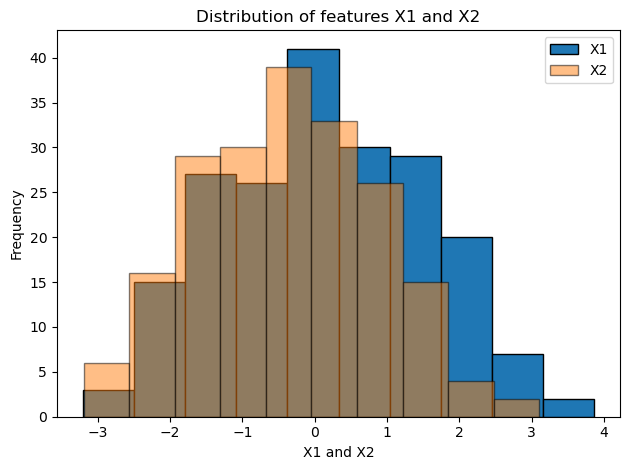

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, tight_layout=True)


axs.hist(a3_data["x1"], bins=10, density=False, edgecolor = "black")

axs.hist(a3_data["x2"], bins=10, density=False, edgecolor = "black", alpha = 0.5)

plt.legend(["X1", "X2"])

plt.title("Distribution of features X1 and X2")
plt.xlabel("X1 and X2")
plt.ylabel("Frequency")


# axs[1].hist(dist1, bins=n_bins, density=True)



In [5]:
from sklearn.model_selection import train_test_split

a3_features = (a3_data[["Intercept","x1","x2"]].values)

# a3_response = (a3_data["y"].values).reshape(200,1)
a3_response = (a3_data["y"].values)

X_train, X_test, y_train, y_test = train_test_split(a3_features, a3_response, test_size=0.30, shuffle=True, random_state=42, stratify=a3_response)


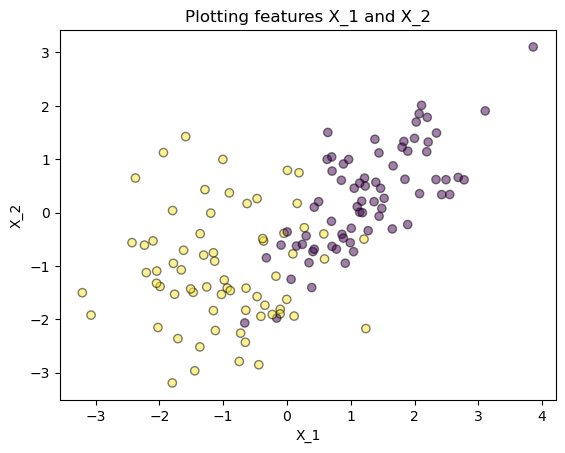

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# assign categories
categories = y_train
colors_train = np.array(
    ["red" if i == 1 else "blue" for i in y_train]
)  # categories

# assign colormap
colormap = colors_train


plt.xlabel("X_1")
plt.ylabel("X_2")

# depict illustration
plt.scatter(
    X_train[:, 1], X_train[:, 2], alpha=0.5, c=categories, edgecolor="k"
)
plt.title("Plotting features X_1 and X_2")
plt.show()


- Comment on the data: do the data appear separable? May logistic regression be a good choice for these data? Why or why not?


>The data does appear separable. One can theoretically, diagonally pass a line through the middle of the graph and separate (classify) the data with a fair bit of accuracy. As for logistic regression, it is an excellent choice for this problem because the interest is predicting a binary response variable's classes (1 or 0). Since the method aims to calculate the probability of a class belonging to class 1 or 0 and then making the decision to classify the class based on meeting a certain threshold, it becomes an ideal option. 

**(b)** Do the data require any preprocessing due to missing values, scale differences (e.g. different ranges of values), etc.? If so, how did you handle these issues?

> No missing values were detected. However, the value ranges were slightly different, where the quantiles revealed dissimilarities across both features. Because there isn't a large, overall dissimilarity across the scales, no scaling was required. If one feature had been in millimeters while the other was in centimeters respectively, scaling would likely have been necessary.

### II. Stating the hypothesis set of models to evaluate (we'll use logistic regression) 

Given that our data consists of two features, our logistic regression problem will be applied to a two-dimensional feature space. Recall that our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\top} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\top} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\top}$, and $x_{i,0} \triangleq 1$

Remember from class that we interpret our logistic regression classifier output (or confidence score) as the conditional probability that the target variable for a given sample $y_i$ is from class "1", given the observed features, $\mathbf{x}_i$. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=1|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\top} \mathbf{x}_i)$$

In the context of maximizing the likelihood of our parameters given the data, we define this to be the likelihood function $L(\mathbf{w}|y_i,\mathbf{x}_i)$, corresponding to one sample observation from the training dataset.

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, the likelihood we are interested in is the likelihood function of our logistic regression **parameters**, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the likelihood function.*

**No output is required for this section - just read and use this information in the later sections.**

### III. Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data. {-}

**(c)** What is the likelihood function that corresponds to all the $N$ samples in our training dataset that we will wish to maximize? Unlike the likelihood function written above which gives the likelihood function for a *single training data pair* $(y_i, \mathbf{x}_i)$, this question asks for the likelihood function for the *entire training dataset* $\{(y_1, \mathbf{x}_1), (y_2, \mathbf{x}_2), ..., (y_N, \mathbf{x}_N)\}$. 

**(d)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express the likelihood from the last question as a cost function of the model parameters, $C(\mathbf{w})$; that is the negative of the logarithm of the likelihood. Express this cost as an average cost per sample (i.e. divide your final value by $N$), and use this quantity going forward as the cost function to optimize.

**(e)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$. 

To simplify notation, please use $\mathbf{w}^{\top}\mathbf{x}$ instead of writing out $w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ when it appears each time (where $x_{i,0} = 1$ for all $i$). You are also welcome to use $\sigma()$ to represent the sigmoid function. Lastly, this will be a function the features, $x_{i,j}$ (with the first index in the subscript representing the observation and the second the feature; targets, $y_i$; and the logistic regression model parameters, $w_j$.

**(f)** Write out the gradient descent update equation. This should clearly express how to update each weight from one step in gradient descent $w_j^{(k)}$ to the next $w_j^{(k+1)}$.  There should be one equation for each model logistic regression model parameter (or you can represent it in vectorized form). Assume that $\eta$ represents the learning rate.

## Answer 
---

**(c)** What is the likelihood function that corresponds to all the $N$ samples in our training dataset that we will wish to maximize? Unlike the likelihood function written above which gives the likelihood function for a *single training data pair* $(y_i, \mathbf{x}_i)$, this question asks for the likelihood function for the *entire training dataset* $\{(y_1, \mathbf{x}_1), (y_2, \mathbf{x}_2), ..., (y_N, \mathbf{x}_N)\}$. 


This is the likelihood function for all N samples, w are the weights that we want to optimize this function for:

$𝐿(𝒘|𝒚, 𝑿) = \prod_{i=1}^N P(y_i|x_i) = \prod_{i=1}^N P(y_i = 1 | x_i)^{y_i} P(y_i = 0 | x_i)^{1-y_i}$

After substituting for the following terms:

$P(y_i = 1 | x_i) = \sigma(\mathbf{w}^{\top}\mathbf{x}_i)$

AND 

$P(y_i = 0 | x_i) = 1 - \sigma(\mathbf{w}^{\top}\mathbf{x}_i)$

$\sigma$ is the sigmoid function required for use in logistic regression.


One gets:

$𝐿(𝒘|𝒚, 𝑿) = \prod_{i=1}^N (\sigma(\mathbf{w}^{\top}\mathbf{x}_i))^{y_i} [1 - \sigma(\mathbf{w}^{\top}\mathbf{x}_i)]^{1-y_i}$




**(d)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express the likelihood from the last question as a cost function of the model parameters, $C(\mathbf{w})$; that is the negative of the logarithm of the likelihood. Express this cost as an average cost per sample (i.e. divide your final value by $N$), and use this quantity going forward as the cost function to optimize.




<!-- $\log 𝐿(𝒘|𝒚, 𝑿) = \log [ \prod_{i=1}^N \hat{y_i} ^ {y_i} [1 - \hat{y_i}]^{1-y_i}] = \sum_{i=1}^{N} \log(\hat{y_i} ^ {y_i} [1 - \hat{y_i}]^{1-y_i})$


$ \log 𝐿(𝒘|𝒚, 𝑿) = \sum_{i=1}^{N} \log(\hat{y_i}) + (1-y_i)\cdot \log (1-y_i)$

Our cost:

$ C(𝒘)= \frac{1}{N} \cdot -\log 𝐿(𝒘|𝒚, 𝑿) = -\frac{1}{N}[\sum_{i=1}^{N} \log(\hat{y_i}) + (1-y_i)\cdot \log (1-y_i)]$ -->

Hidden

$\log 𝐿(𝒘|𝒚, 𝑿) = \log [ \prod_{i=1}^N \hat{y_i} ^ {y_i} [1 - \hat{y_i}]^{1-y_i}] = \sum_{i=1}^{N} \log(\hat{y_i} ^ {y_i} [1 - \hat{y_i}]^{1-y_i})$


$ \log 𝐿(𝒘|𝒚, 𝑿) = \sum_{i=1}^{N} y_i \log(\hat{y_i}) + (1-y_i)\cdot \log (1-\hat{y_i})$

We know that the estimates of the probabilities (that later become classified as our predictions in future steps) are represented by $\hat{y_i}$, and $\hat{y_i}$ is represented by:

$\hat{y_i} = \sigma(\mathbf{w}^{\top}\mathbf{x}_i)$

Our average cost is accomplished by dividing by N, and we make it negative to go in the opposite direction for when we execute gradient descent:

$ C(𝒘)= \frac{1}{N} \cdot -\log 𝐿(𝒘|𝒚, 𝑿) = -\frac{1}{N}[\sum_{i=1}^{N} y_i \log[\sigma(\mathbf{w}^{\top}\mathbf{x}_i)] + (1-y_i)\cdot \log[(1-\sigma(\mathbf{w}^{\top}\mathbf{x}_i)]]$

**(e)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$. 

To simplify notation, please use $\mathbf{w}^{\top}\mathbf{x}$ instead of writing out $w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ when it appears each time (where $x_{i,0} = 1$ for all $i$). You are also welcome to use $\sigma()$ to represent the sigmoid function. Lastly, this will be a function the features, $x_{i,j}$ (with the first index in the subscript representing the observation and the second the feature; targets, $y_i$; and the logistic regression model parameters, $w_j$.


It is important to reiterate that the $log$ here refers to the natural logarithm (base e):

$ C(𝒘)= \frac{1}{N} \cdot -\log 𝐿(𝒘|𝒚, 𝑿) = -\frac{1}{N}[\sum_{i=1}^{N} y_i \log[\sigma(\mathbf{w}^{\top}\mathbf{x}_i)] + (1-y_i)\cdot \log[1-\sigma(\mathbf{w}^{\top}\mathbf{x}_i)]]$

The sigmoid function is represented by:

$\sigma =  \frac{1}{1+e^{-x}} = \frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}}$

We will expand and rearrange this expression:

$ C(𝒘)= -\frac{1}{N}[\sum_{i=1}^{N} y_i \log[\sigma(\mathbf{w}^{\top}\mathbf{x}_i)] + [1-y_i]\cdot \log[1-\sigma(\mathbf{w}^{\top}\mathbf{x}_i)]]$

$ C(𝒘) = -\frac{1}{N}[\sum_{i=1}^{N} y_i \log(\frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}}) + (1-y_i)\cdot \log(1-\frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}})]$

We will now focus on the expression inside the summation to further simplify it:

$ y_i \log(\frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}}) + (1-y_i)\cdot \log(1-\frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}}) $


$y_i [log(1) - log(\frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}})) + (1-y_i)\cdot \log(\frac{e^{-\mathbf{w}^{\top}\mathbf{x}_i}}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}})$

$y_i [log(1) - log(\frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}})) + (1-y_i)\cdot \log(\frac{e^{-\mathbf{w}^{\top}\mathbf{x}_i}}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}})$

$ - y_i \cdot log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}) + (1-y_i)\cdot [\log(e^{-\mathbf{w}^{\top}\mathbf{x}_i}) - \log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i})]$

$ - y_i \cdot log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}) + (1-y_i)\cdot [-\mathbf{w}^{\top}\mathbf{x}_i - \log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i})]$

$ - y_i \cdot log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}) + -\mathbf{w}^{\top}\mathbf{x}_i - \log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}) + y_i \cdot \mathbf{w}^{\top}\mathbf{x}_i + y_i \cdot \log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i})$

$ -\mathbf{w}^{\top}\mathbf{x}_i - \log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}) + y_i \cdot \mathbf{w}^{\top}\mathbf{x}_i $

Now we need to take the partial derivatives of everything inside that expression in respect to the weights. However, the process will be shown for one, and all that will change is the parameter from one gradient to another.
First, the chain rule will be needed to finish this problem. 


Let's look at it per term: 

$\frac{d}{dw_i} -\mathbf{w}^{\top}\mathbf{x}_i = -x_i$

The second ter is much harder :

$\frac{d}{dw_i} \log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}) = \frac{d}{du} ln(u) \cdot \frac{d}{dv} (1 + e^v) \cdot \frac{d}{dw_i}(-\mathbf{w}^{\top}\mathbf{x}_i)$

$\frac{d}{dw_i} \log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}) = \frac{1}{u} \cdot (\frac{d}{dv} 1 + \frac{d}{dv}e^v) \cdot \frac{d}{dw_i}(-\mathbf{w}^{\top}\mathbf{x}_i)$

$\frac{d}{dw_i} \log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}) = \frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} \cdot e^{-\mathbf{w}^{\top}\mathbf{x}_i} \cdot -x_i$

$\frac{d}{dw_i} \log(1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}) = -x \cdot \frac{e^{-\mathbf{w}^{\top}\mathbf{x}_i}}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} $

We can now finish evaluating the gradient.

$\frac{\partial C}{\partial w_i} = -\frac{1}{N} \cdot \sum_{i=1}^{N} [- x_i - (-x_i \cdot \frac{e^{-\mathbf{w}^{\top}\mathbf{x}_i}}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}}) + y_i x_i]$

$\frac{\partial C}{\partial w_i} = -\frac{1}{N} \cdot \sum_{i=1}^{N} [- x_i [ -y_i + 1 - \frac{e^{-\mathbf{w}^{\top}\mathbf{x}_i}}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} ]]$

Let's move that $-1$ outside to turn the $-\frac{1}{N}$ positive, as well as subtract that fraction from $1$:

$\frac{\partial C}{\partial w_i} = \frac{1}{N} \cdot \sum_{i=1}^{N} [x_i [ -y_i + \frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} ]]$

After one more rewrite :

$\frac{\partial C}{\partial w_i} = \frac{1}{N} \cdot \sum_{i=1}^{N} [x_i [ \frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} - y_i]]$





Then, all one has to do is remember this is in respect to every $w$ : 

$\dfrac{\partial C}{\partial w_0} = \frac{1}{N} \cdot \sum_{i=1}^{N} [x_0 [ \frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} - y_i]]$ 


$\dfrac{\partial C}{\partial w_1} = \frac{1}{N} \cdot \sum_{i=1}^{N} [x_1 [ \frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} - y_i]]$


$\dfrac{\partial C}{\partial w_2} = \frac{1}{N} \cdot \sum_{i=1}^{N} [x_2 [ \frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} - y_i]]$

**(f)** Write out the gradient descent update equation. This should clearly express how to update each weight from one step in gradient descent $w_j^{(k)}$ to the next $w_j^{(k+1)}$.  There should be one equation for each model logistic regression model parameter (or you can represent it in vectorized form). Assume that $\eta$ represents the learning rate.

$w_j^{(k+1)} = w_j^{(k)} +  \eta \cdot \nabla C(𝒘) $

This is the update for each weight during the gradient descent process.



$w_0^{(k+1)} = w_0^{(k)} +  \eta \cdot \frac{1}{N} \cdot \sum_{i=1}^{N} [x_0 [ \frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} - y_i]] $

$w_1^{(k+1)} = w_1^{(k)} +  \eta \cdot \frac{1}{N} \cdot \sum_{i=1}^{N} [x_1 [ \frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} - y_i]] $

$w_2^{(k+1)} = w_2^{(k)} +  \eta \cdot \frac{1}{N} \cdot \sum_{i=1}^{N} [x_2 [ \frac{1}{1+e^{-\mathbf{w}^{\top}\mathbf{x}_i}} - y_i]] $

### IV. Implement gradient descent and your logistic regression algorithm 

**(g)** Implement your logistic regression model. 
- You are provided with a template, below, for a class with key methods to help with your model development. It is modeled on the Scikit-Learn convention. For this, you only need to create a version of logistic regression for the case of two feature variables (i.e. two predictors).
- Create a method called `sigmoid` that calculates the sigmoid function
- Create a method called `cost` that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels. This should be the **average cost** (make sure your total cost is divided by your number of samples in the dataset).
- Create a method called `gradient_descent` to run **one step** of gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. 
- Create a method called `fit` that fits the model to the data (i.e. sets the model parameters to minimize cost) using your `gradient_descent` method. In doing this we'll need to make some assumptions about the following:
    - Weight initialization. What should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
    - Learning rate. How slow/fast should the algorithm step towards the minimum? This you will vary in a later part of this problem.
    - Stopping criteria. When should the algorithm be finished searching for the optimum? There are two stopping criteria: small changes in the gradient descent step size and a maximum number of iterations. The first is whether there was a sufficiently small change in the gradient; this is evaluated as whether the magnitude of the step that the gradient descent algorithm takes changes by less than $10^{-6}$ between iterations. Since we have a weight vector, we can compute the change in the weight by evaluating the $L_2$ norm (Euclidean norm) of the change in the vector between iterations. From our gradient descent update equation we know that mathematically this is $||-\eta\nabla_{\mathbf{w}}C(\mathbf{w})||$. The second criterion is met if a maximum number of iterations has been reach (5,000 in this case, to prevent infinite loops from poor choices of learning rates).
    - Design your approach so that at each step in the gradient descent algorithm you evaluate the cost function for both the training and the test data for each new value for the model weights. You should be able to plot cost vs gradient descent iteration for both the training and the test data. This will allow you to plot "learning curves" that can be informative for how the model training process is proceeding.
- Create a method called `predict_proba` that predicts confidence scores (that can be thresholded into the predictions of the `predict` method.
- Create a method called `predict` that makes predictions based on the trained model, selecting the most probable class, given the data, as the prediction, that is class that yields the larger $P(y|\mathbf{x})$.
- (Optional, but recommended) Create a method called `learning_curve` that produces the cost function values that correspond to each step from a previously run gradient descent operation.
- (Optional, but recommended) Create a method called `prepare_x` which appends a column of ones as the first feature of the dataset $\mathbf{X}$ to account for the bias term ($x_{i,1}=1$).

This structure is strongly encouraged; however, you're welcome to adjust this to your needs (adding helper methods, modifying parameters, etc.).

In [7]:
# Logistic regression class
class Logistic_regression:
    # Class constructor
    def __init__(self):
        self.w = None     # logistic regression weights
        self.saved_w = [] # Since this is a small problem, we can save the weights
                          #  at each iteration of gradient descent to build our 
                          #  learning curves
        # returns nothing
        pass
    
    # Method for calculating the sigmoid function of w^T X for an input set of weights
    def sigmoid(self, X, w):
        # returns the value of the sigmoid
        pass
    
    # Cost function for an input set of weights
    def cost(self, X, y, w):
        # returns the average cross entropy cost
        pass
    
    # Update the weights in an iteration of gradient descent
    def gradient_descent(self, X, y, lr):
        # returns a scalar of the magnitude of the Euclidean norm 
        #  of the change in the weights during one gradient descent step
        pass
    
    # Fit the logistic regression model to the data through gradient descent
    def fit(self, X, y, w_init, lr, delta_thresh=1e-6, max_iter=5000, verbose=False):
        # Note the verbose flag enables you to print out the weights at each iteration 
        #  (optional - but may help with one of the questions)
        
        # returns nothing
        pass
    
    # Use the trained model to predict the confidence scores (prob of positive class in this case)
    def predict_proba(self, X):
        # returns the confidence score for the each sample
        pass
    
    # Use the trained model to make binary predictions
    def predict(self, X, thresh=0.5):
        # returns a binary prediction for each sample
        pass
    
    # Stores the learning curves from saved weights from gradient descent
    def learning_curve(self, X, y):
        # returns the value of the cost function from each step in gradient descent
        #  from the last model fitting process
        pass
    
    # Appends a column of ones as the first feature to account for the bias term
    def prepare_x(self, X):
        # returns the X with a new feature of all ones (a column that is the new column 0)
        pass

Answer to Part IV : Building the Logistic Regression Model 
---

In [8]:
# My Logistic Regression Model


# Logistic regression class
class Logistic_regression:
    # Class constructor
    def __init__(self):

        """Initialize the weights and empty lists of costs and weights"""

        self.w = [None]     # logistic regression weights
        self.saved_w = [] # Since this is a small problem, we can save the weights
                          #  at each iteration of gradient descent to build our 
                          #  learning curves
        self.N = None # Size of feature data
        # returns nothing
        pass
    
    # Method for calculating the sigmoid function of w^T X for an input set of weights
    def sigmoid(self, X, w):
        """Returns the value of the sigmoid"""

        return 1 / (1+np.e**(X @ -w))

    # Cost function for an input set of weights
    def cost(self, X, y, w):
        """Returns the average cross entropy cost"""
        
        # 10^-5  is needed to avoid log (0)

        return (y @ np.log(self.sigmoid(X,w)+10**-5) + (1-y) @ np.log(1-self.sigmoid(X,w)+10**-5))/-self.N
    
    # Update the weights in an iteration of gradient descent
    def gradient_descent(self, X, y, lr):
        """returns a scalar of the magnitude of the Euclidean norm 
           of the change in the weights during one gradient descent step"""

        gradient = 1/self.N * (X.T @ (self.sigmoid(X,self.w) - y))
        step = lr * gradient
        self.w = self.w - step
        step_magnitude = np.linalg.norm(step)

        return step_magnitude
    
    # Fit the logistic regression model to the data through gradient descent
    def fit(self, X, y, w_init = None, lr = 10**-0, delta_thresh=1e-6, max_iter=5000, need_thresh = True, verbose = False):
        """"Fit the logistic regression model to the data through gradient descent.
            w_init, if left to none, will initialize to random weights.
            lr is the learning rate.
            delta_thresh is one of the stopping criteria measuring the change in magnitude
            of the gradient descent steps. This can be deactivated with need_thresh.
            max_iter lets user set how long the gradient descent can go.
            Verbose lets the user print the iteration step and the weights at the iteration"""
        
        # Initializing the weights

        if w_init is None:

            self.w = np.random.random(X.shape[1])

        else: 

            pass


        # Saving initial attribute values

        self.N = X.shape[0]

        self.w = w_init

        # Appending initial weights, cost and iteration step : 0

        self.saved_w.append(self.w.copy()) 
        
        # Preparing the stopping criteria variables

        # Initializing local variables that will record the magnitude of the gradient descent steps 
        
        changes = [0,1]

        previous_change = 0 

        new_change = 1 

        iteration_number = 0 # To keep track of the original max_iteration value.

        # Fitting the model

        if need_thresh is True:
                
            while (abs(new_change - previous_change)) > delta_thresh and iteration_number < max_iter :

                update_change = self.gradient_descent(X, y, lr) # The weights were also updated during this step

                changes.append(update_change)

                previous_change, new_change = changes[-2], changes[-1]

                self.saved_w.append(self.w.copy())

                iteration_number += 1

                if verbose:

                    print(f"Iteration Step {iteration_number}, weights = {self.w}")

            # returns nothing

            pass

        else:
                
            while max_iter > 0:

                self.gradient_descent(X, y, lr) # The weights were also updated during this step

                self.saved_w.append(self.w.copy())

                max_iter -= 1

                if verbose:
                    
                    print(f"Iteration Step {iteration_number}, weights = {self.w}")

            # returns nothing

            pass
    
    # Use the trained model to predict the confidence scores (prob of positive class in this case)
    def predict_proba(self, X):

        """Returns the confidence score for each sample"""
        
        probabilities = self.sigmoid(X, self.w)

        return probabilities

    # Use the trained model to make binary predictions
    def predict(self, X, thresh=0.5):
        """returns a binary prediction for each sample"""

        predictions = self.predict_proba(X)

        predictions[predictions >= thresh] = 1

        predictions[predictions < thresh] = 0
        
        return predictions
    
    # Returns the learning curves produced from saved weights during gradient descent
    def learning_curve(self, X, y):

        """Returns the learning curves produced from saved weights during gradient descent"""

        iteration_count = []

        iteration_costs = []

        for i in range(0, len(self.saved_w)):

             
            saved_cost = self.cost(X,y,self.saved_w[i])

            iteration_costs.append(saved_cost)
            iteration_count.append(i)
        
        return np.array(iteration_count), np.array(iteration_costs)


    # Appends a column of ones as the first feature to account for the bias term
    def prepare_x(self, X):
        """returns the X with a new feature of all ones (a column that is the new column 0)"""
        ones = np.ones((X.shape[0],1))
        new_X = np.hstack((ones, X))
        return new_X

**(h)** Choose a learning rate and fit your model. Learning curves are a plot of metrics of model performance evaluated through the process of model training to provide insight about how model training is proceeding. Show the learning curves for the gradient descent process for learning rates of $\{10^{-0}, 10^{-2}, 10^{-4}\}$. For each learning rate plot the learning curves by plotting **both the training and test data average cost** as a function of each iteration of gradient descent. You should run the model fitting process until it completes (up to 5,000 iterations of gradient descent). Each of the 6 resulting curves (train and test average cost for each learning rate) should be plotted on the **same set of axes** to enable direct comparison. *Note: make sure you're using average cost per sample, not the total cost*.
- Try running this process for a really big learning rate for this problem: $10^2$. Look at the weights that the fitting process generates over the first 50 iterations and how they change. Either print these first 50 iterations as console output or plot them. What happens? How does the output compare to that corresponding to a learning rate of $10^0$ and why?
- What is the impact that the different values of learning have on the speed of the process and the results? 
- Of the options explored, what learning rate do you prefer and why?
- Use your chosen learning rate for the remainder of this problem.

In [9]:
# Empty blocks to help this print nicely in pdf

In [10]:
# Empty blocks to help this print nicely in pdf

In [11]:
# Empty blocks to help this print nicely in pdf

Answer : (h)
---

### Fitting the model for learning rates of $\{10^{-0}, 10^{-2}, 10^{-4}\}$. 

In [12]:

# setting random seed to 42

np.random.seed(12)

random_weights = np.random.random(X_train.shape[1])


print(random_weights)

[0.15416284 0.7400497  0.26331502]


In [13]:
# Variable Names : X_train, X_test, y_train, y_test
# LR : 10 ^ -0
# Train data 

logit_ten_minuszero = Logistic_regression()

logit_ten_minuszero.fit(X = X_train, y = y_train, w_init = random_weights, lr = 10**-0, delta_thresh=1e-6, max_iter=5000, need_thresh=True)

minuszero_step, minuszero_costs = logit_ten_minuszero.learning_curve(X_train, y_train)


# Test data 

minuszero_test_step, minuszero_test_costs = logit_ten_minuszero.learning_curve(X_test, y_test)


In [14]:
# LR : 10 ^ -2
# Train data

logit_ten_minustwo = Logistic_regression()

logit_ten_minustwo.fit(X = X_train, y = y_train, w_init = random_weights, lr = 10**-2, delta_thresh=1e-6, max_iter=5000,need_thresh=True)

minustwo_step, minustwo_costs = logit_ten_minustwo.learning_curve(X_train, y_train)


# Test data 

minustwo_test_step, minustwo_test_costs = logit_ten_minustwo.learning_curve(X_test, y_test)


In [15]:
# LR : 10 ^ -4
# Train data

logit_ten_minusfour = Logistic_regression()
logit_ten_minusfour.fit(X = X_train, y = y_train, w_init = random_weights, lr = 10**-4, delta_thresh=1e-6, max_iter=5000,need_thresh=True)
minusfour_step, minusfour_costs = logit_ten_minusfour.learning_curve(X_train, y_train)


# Test data 

minusfour_test_step, minusfour_test_costs = logit_ten_minusfour.learning_curve(X_test, y_test)

In [16]:

# Preparing figure
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


# Plotting
ax1.plot(minuszero_step, minuszero_costs, color="red", label="Train $10^{-0}$")
ax1.plot(minustwo_step, minustwo_costs, color="blue", label="Train $10^{-2}$")
ax1.plot(minusfour_step, minusfour_costs, color="green", label="Train $10^{-4}$")
ax1.plot(minuszero_test_step, minuszero_test_costs, color = '#c73c1e', label="Test $10^{-0}$")
ax1.plot(minustwo_test_step, minustwo_test_costs, color = '#7c9be9', label="Test $10^{-2}$")
ax1.plot(minusfour_test_step, minusfour_test_costs, color="#5cfa46", label="Test $10^{-4}$")
# ax1.plot(plustwo_step, plustwo_costs, color="#7f2b8a", label="Train $10^{2}$")
# ax1.plot(plustwo_test_step, plustwo_test_costs, color = '#e522ff', label="Test $10^{2}$")
ax1.legend()
ax1.set_xlabel("Gradient Descent Steps")
ax1.set_ylabel("Average Costs")
ax1.legend()
ax1start, ax1end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(0, ax1end, 100))

ax2.plot(minusfour_step, minusfour_costs, color="green", label="Train $10^{-4}$")
ax2.plot(minusfour_test_step, minusfour_test_costs, color="#5cfa46", label="Test $10^{-4}$")
ax2.legend()
ax2.set_xlabel("Gradient Descent Steps")
ax2.set_ylabel("Average Costs")
ax2.legend()



logit_ten_minusfour_fulliter = Logistic_regression()
logit_ten_minusfour_fulliter.fit(X = X_train, y = y_train, w_init = random_weights, lr = 10**-4, delta_thresh=1e-6, max_iter=5000,need_thresh=False)
minusfour_fulliter_step, minusfour_fulliter_costs = logit_ten_minusfour_fulliter.learning_curve(X_train, y_train)


# Test data 

minusfour_fulliter_test_step, minusfour_fulliter_test_costs = logit_ten_minusfour_fulliter.learning_curve(X_test, y_test)
# Plotting
ax3.plot(minuszero_step, minuszero_costs, color="red", label="Train $10^{-0}$")
ax3.plot(minustwo_step, minustwo_costs, color="blue", label="Train $10^{-2}$")
ax3.plot(minusfour_fulliter_step, minusfour_fulliter_costs, color="green", label="Train $10^{-4}$")
ax3.plot(minuszero_test_step, minuszero_test_costs, color = '#c73c1e', label="Test $10^{-0}$")
ax3.plot(minustwo_test_step, minustwo_test_costs, color = '#7c9be9', label="Test $10^{-2}$")
ax3.plot(minusfour_fulliter_test_step, minusfour_fulliter_test_costs, color="#5cfa46", label="Test $10^{-4}$")
# ax1.plot(plustwo_step, plustwo_costs, color="#7f2b8a", label="Train $10^{2}$")
# ax1.plot(plustwo_test_step, plustwo_test_costs, color = '#e522ff', label="Test $10^{2}$")
ax3.legend()
ax3.set_xlabel("Gradient Descent Steps")
ax3.set_ylabel("Average Costs")
ax3.legend()


ax4.plot(minusfour_fulliter_step, minusfour_fulliter_costs, color="green", label="Train $10^{-4}$")
ax4.plot(minusfour_fulliter_test_step, minusfour_fulliter_test_costs, color="#5cfa46", label="Test $10^{-4}$")
ax4.legend()
ax4.set_xlabel("Gradient Descent Steps")
ax4.set_ylabel("Average Costs")
ax4.legend()



# ax1.set_ylim(0,)
# start, end = ax1.get_xlim()

# ax1.xaxis.set_ticks(np.arange(0, end, 50))

# plt.xlabel("Gradient Descent Steps", size = 14, x = -.1, y = -1)
# plt.ylabel("Average Costs")
plt.legend()
plt.title("Training and Test Costs per Different Learning Rates",size = 14, x = -.1, y = 2.23)
plt.show()

print(f"The final costs for the learnign rates of $10^{-2}$ and $10^{-0}$ are {minustwo_test_costs[-1]:.3f} and {minuszero_test_costs[-1]:.3f}.")

>This is the graph for the six learning curves according to the test and training data. The curves for $10^{-4}$ have been zoomed in for the second graph. The next cell blocks will address the questions in part H. As for first observations, for this particular exercise or instance, the learning rate that produced the final lowest training and test errors corresponds to $10^{-0}$. The learning rates of $10^{-2}$ needed more iterations, and incurred slightly final higher costs for the test set and sufficiently higher cost for the training set when compared to the results of a learning rate of $10^{-0}$. As for $10^{-4}$, the plot needed some visual augmentation in order to be visible. This learning rate hits an early stop. However, despite finishing faster, it incurred much higher, final cost than any of its counterparts, making it the worst of the learning rates. We learn here that the learning rate can't be too small. Either it converges quickly and yields a somewhat high cost due to the stopping criteria of low magnitude changes in the L2 norm, or it continues stepping until the max iteration limit is reached (when the L2 norm criteria is ignored), with very minor decreases to the overall costs, as demonstrated in the plot above. 

- Try running this process for a really big learning rate for this problem: $10^2$. Look at the weights that the fitting process generates over the first 50 iterations and how they change. Either print these first 50 iterations as console output or plot them. What happens? How does the output compare to that corresponding to a learning rate of $10^0$ and why?

Iteration Step 1, weights = [ -4.49555412 -92.22972662 -55.75288508]
Iteration Step 2, weights = [ -6.76247939 -90.06208825 -48.34102503]
Iteration Step 3, weights = [ -7.90345288 -86.93015116 -42.67675814]
Iteration Step 4, weights = [ -8.57127314 -83.67731695 -37.31832484]
Iteration Step 5, weights = [ -8.57070577 -80.20928555 -32.55998888]
Iteration Step 6, weights = [ -8.17080348 -76.67356241 -28.0652458 ]
Iteration Step 7, weights = [ -7.31190375 -73.04916712 -23.939373  ]
Iteration Step 8, weights = [ -5.81406306 -69.22023708 -20.58767719]
Iteration Step 9, weights = [ -4.27433802 -65.36423952 -17.32545852]
Iteration Step 10, weights = [ -2.74586076 -61.50229433 -14.07793565]
Iteration Step 11, weights = [ -1.21931532 -57.6373357  -10.84233313]
Iteration Step 12, weights = [  0.32614962 -53.76870964  -7.63080197]
Iteration Step 13, weights = [  1.91119949 -49.89501981  -4.46053153]
Iteration Step 14, weights = [  3.47292788 -46.01534989  -1.42698477]
Iteration Step 15, weights = 

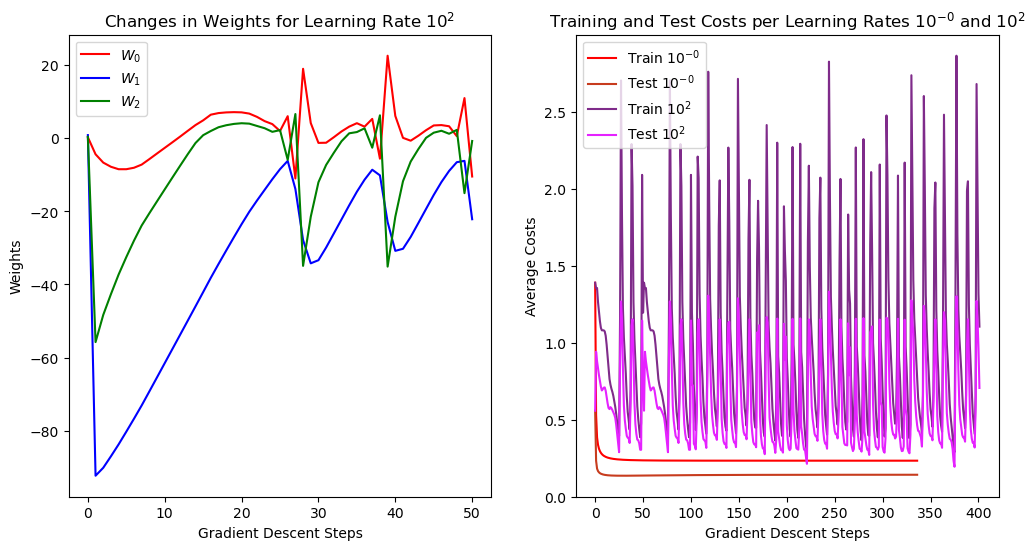

In [ ]:
# LR : 10 ^ 2
# Train data

logit_ten_plustwo = Logistic_regression()
logit_ten_plustwo.fit(X = X_train, y = y_train, w_init = random_weights, lr = 10**2, delta_thresh=1e-6, max_iter=50,need_thresh=True, verbose=True)
plustwo_step, plustwo_costs = logit_ten_plustwo.learning_curve(X_train, y_train)


# Test data 

plustwo_test_step, plustwo_test_costs = logit_ten_plustwo.learning_curve(X_test, y_test)


plust_two_weights = np.array(logit_ten_plustwo.saved_w)

# Preparing figure
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


# Plotting

ax1.plot(plustwo_step, plust_two_weights[:,0], color="red", label="$W_0$")
ax1.plot(plustwo_step, plust_two_weights[:,1], color="blue", label="$W_1$")
ax1.plot(plustwo_step, plust_two_weights[:,2], color="green", label="$W_2$")
ax1.set_xlabel("Gradient Descent Steps")
ax1.set_ylabel("Weights")
ax1.set_title("Changes in Weights for Learning Rate $10^{2}$")
ax1.legend()

logit_ten_plustwo.fit(X = X_train, y = y_train, w_init = random_weights, lr = 10**2, delta_thresh=1e-6, max_iter=350,need_thresh=True, verbose=False)
plustwo_step, plustwo_costs = logit_ten_plustwo.learning_curve(X_train, y_train)
plustwo_test_step, plustwo_test_costs = logit_ten_plustwo.learning_curve(X_test, y_test)
plust_two_weights = np.array(logit_ten_plustwo.saved_w)

ax2.plot(minuszero_step, minuszero_costs, color="red", label="Train $10^{-0}$")
ax2.plot(minuszero_test_step, minuszero_test_costs, color = '#c73c1e', label="Test $10^{-0}$")
ax2.plot(plustwo_step, plustwo_costs, color="#7f2b8a", label="Train $10^{2}$")
ax2.plot(plustwo_test_step, plustwo_test_costs, color = '#e522ff', label="Test $10^{2}$")
ax2.set_xlabel("Gradient Descent Steps")
ax2.set_ylabel("Average Costs")
ax2.set_title("Training and Test Costs per Learning Rates $10^{-0}$ and $10^{2}$")
ax2.legend()

# ax1.set_ylim(0,)
# start, end = ax1.get_xlim()

# ax1.xaxis.set_ticks(np.arange(0, end, 50))

plt.show()


- Try running this process for a really big learning rate for this problem: $10^2$. Look at the weights that the fitting process generates over the first 50 iterations and how they change. Either print these first 50 iterations as console output or plot them. What happens? How does the output compare to that corresponding to a learning rate of $10^0$ and why?

>After running this process, one can observe that the values in the weights decline sharply, but rise and fall erratically in a repetitive fashion. There is an intuitive reason behind this. Gradient descent's purpose is to optimize the weights, and it can best accomplish this task as it approaches or converges near the local minimum. What is happening here is that the local minimum was essentially crossed, and now the weights are trying to be course corrected in a pendulum like fashion, where it either goes too far to the right or the left of the global minimum. When they are too high, they need to be lowered aggresively, and, when they are too low, they need to be incremented swiftly. It will never converge; in fact, the cost is mirroring this exact behavior, it is going up and down with no rhyme or reason. In conclusion, a high learning rate will lead to never ending cycle of no convergence. In contrast to this learning rate of $10^{2}$, a lower one of 1 or $10^-0$ finishes its process earlier and with lower costs due to taking smaller steps that do not skip over the local minimum; the steps for a learning rate of $10^{2}$ are simply too large, and they miss this local minimum.

- What is the impact that the different values of learning have on the speed of the process and the results? 

>For the following conclusions, they will be centered exclusively on the test cost. Firstly, an extremely high learning rate ($10^{2}$) never converges on the global minimum due to taking large steps, and, in a pendulum-like fashion, continues to take steps to increase and lower the weights, and the costs corresponding to each of those weights imitate this erratic behavior. This is the most inefficient learning rate. As for the second most inefficient learning rate of $10^{-4}$, it takes very small steps, so it triggers one of the stopping criteria, and, when ignoring the L2 norm criterion, it simply requires too many iterations to reach the optimal weights. In a similar manner, the small steps correspond to very small, incremental drops in the associated costs. Overall, it had the worst costs aside from the aforementioned learning rate of $10^{2}$. On the other hand, the most efficient learning rates corresponded to $10^{-2}$ and $10^{-0}$. For these two rates, one can observe the most interesting behavior. For the former ($10^{-2}$), it requires more iterations, but it steadily reduces the weights in an effort to converge and eventually reach its lowest costs. For the latter, it finished the process in less iterations, and it also achieved a higher final cost. Both were excellent, but one was better because it was faster and yielded a lower final cost.

- Of the options explored, what learning rate do you prefer and why?

>Given the prior evidence, a learning rate of $10^{-0}$ is the most optimal due to a lower final cost than its $10^-2$ counterpart, as well as less computational requirements. 

### V. Evaluate your model performance through cross validation 

**(i)** Test the performance of your trained classifier using K-folds cross validation resampling technique. The scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful. 
- Train your logistic regression model and a K-Nearest Neighbor classification model with $k=7$ nearest neighbors.
- Using the trained models, make four plots: two for logistic regression and two for KNN. For each model have one plot showing the training data used for fitting the model, and the other showing the test data. On each plot, include the decision boundary resulting from your trained classifier.
- Produce a Receiver Operating Characteristic curve (ROC curve) that represents the performance from cross validated performance evaluation for each classifier (your logistic regression model and the KNN model, with $k=7$ nearest neighbors). For the cross validation, use $k=10$ folds. 
  - Plot these curves on the same set of axes to compare them
  - On the ROC curve plot, also include the chance diagonal for reference (this represents the performance of the worst possible classifier). This is represented as a line from $(0,0)$ to $(1,1)$.
  - Calculate the Area Under the Curve for each model and include this measure in the legend of the ROC plot.
- Comment on the following:
  - What is the purpose of using cross validation for this problem?
  - How do the models compare in terms of performance (both ROC curves and decision boundaries) and which model (logistic regression or KNN) would you select to use on previously unseen data for this problem and why?

**Answer** 
---

- Using the trained models, make four plots: two for logistic regression and two for KNN. For each model have one plot showing the training data used for fitting the model, and the other showing the test data. On each plot, include the decision boundary resulting from your trained classifier.

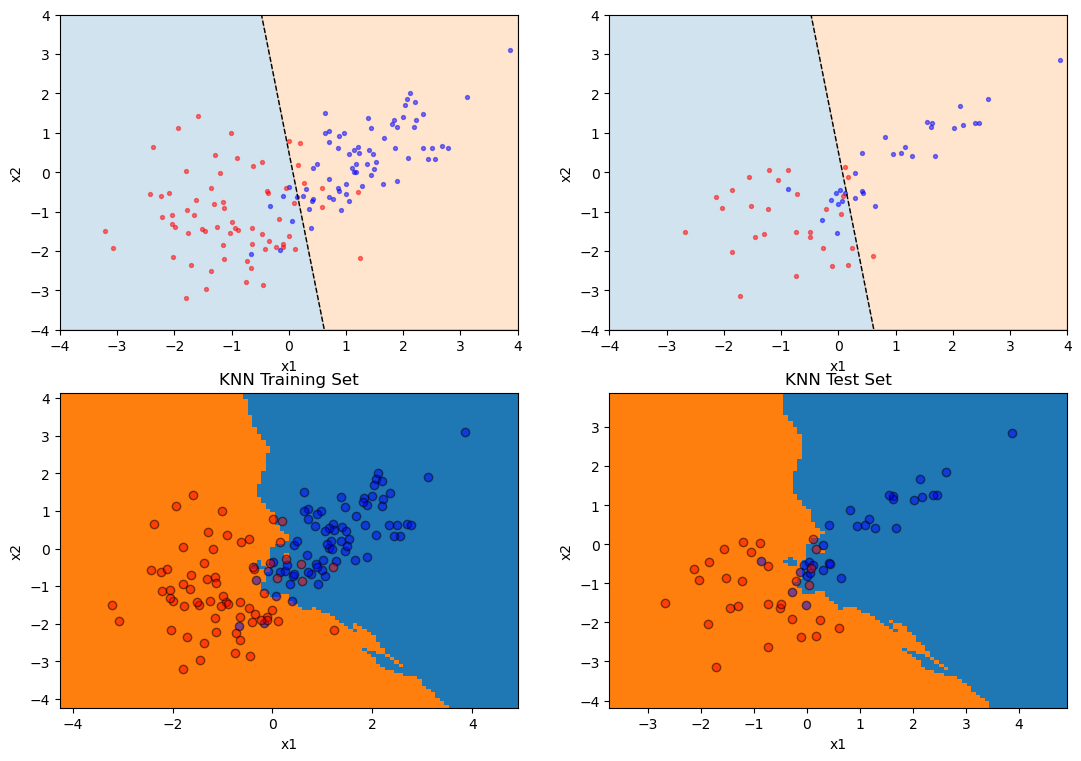

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

# Fit the data to a logistic regression model.

part_V_logit_model = Logistic_regression()

part_V_logit_model.fit(X = X_train, y = y_train, w_init = random_weights, lr = 10**-0, delta_thresh=1e-6, max_iter=5000,need_thresh=True)

pv_train_predictions_logit = part_V_logit_model.predict(X_train)
pv_test_predictions_logit = part_V_logit_model.predict(X_test)

fig = plt.figure(figsize=(13, 9))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# The weights of the model
pv_weights = part_V_logit_model.w
intercept = pv_weights[0]
w1, w2 = pv_weights[1], pv_weights[2]

# Calculate the intercept and gradient of the decision boundary.
c = -intercept/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -4, 4
ymin, ymax = -4, 4
xd = np.array([xmin, xmax])
yd = m*xd + c

ax1.plot(xd, yd, 'k', lw=1, ls='--')
ax1.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
ax1.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
ax1.scatter(X_train[y_train == 0,1], X_train[y_train == 0,2], color = "blue", s=8, alpha=0.5)
ax1.scatter(X_train[y_train == 1,1], X_train[y_train == 1,2], color = "red", s=8, alpha=0.5)
ax1.set_ylim(ymin, ymax)
ax1.set_xlim(xmin, xmax)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")


ax2.plot(xd, yd, 'k', lw=1, ls='--')
ax2.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
ax2.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
ax2.scatter(X_test[y_test == 0,1], X_test[y_test == 0,2], color = "blue", s=8, alpha=0.5)
ax2.scatter(X_test[y_test == 1,1], X_test[y_test == 1,2], color = "red", s=8, alpha=0.5)
ax2.set_ylim(ymin, ymax)
ax2.set_xlim(xmin, xmax)
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")


# Plot the data and the classification with the decision boundary for a KNN model.
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train[:,1:], y_train)
knn_train_predictions = knn.predict(X_train[:,1:])
knn_test_predictions = knn.predict(X_test[:,1:])




# Create color maps
cmap_light = ListedColormap(["tab:blue", "tab:orange"])


DecisionBoundaryDisplay.from_estimator(knn,X_train[:,1:],cmap=cmap_light,ax=ax3,response_method="predict",plot_method="pcolormesh",shading="auto")

# categories_tr = y_train
# categories_test = y_test
# s_colors = np.array(["red" if i == 1 else "blue" for i in categories_tr])  # categories_tr
# s_colors_2 = np.array(["red" if i == 1 else "blue" for i in categories_test])  # categories_test

# assign colormap
# colormap = s_colors
# colormap_2 = s_colors_2

# depict illustration
ax3.scatter(X_train[y_train == 0,1], X_train[y_train == 0,2], alpha=0.5, color = "blue", edgecolor="k")
ax3.scatter(X_train[y_train == 1,1], X_train[y_train == 1,2], alpha=0.5, color = "red", edgecolor="k")
ax3.set_title("KNN Training Set")
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")

DecisionBoundaryDisplay.from_estimator(knn,X_test[:,1:],cmap=cmap_light,ax=ax4,response_method="predict",plot_method="pcolormesh",shading="auto")
ax4.scatter(X_test[y_test == 0,1], X_test[y_test == 0,2], alpha=0.5, color = "blue", edgecolor="k")
ax4.scatter(X_test[y_test == 1,1], X_test[y_test == 1,2], alpha=0.5, color = "red", edgecolor="k")
ax4.set_title("KNN Test Set")
ax4.set_xlabel("x1")
ax4.set_ylabel("x2")


plt.show()







In [ ]:
# ROC curve functions necessary for the plots

def my_tpr_fpr(probabilities, true_y, threshold=0.5):
    """returns a tpr and fpr for a given threshold,
     this custom function only works for a binary classification problem."""

    predictions = probabilities.copy()

    predictions[predictions >= threshold] = 1

    predictions[predictions < threshold] = 0

    predicted_postive_ind = np.where(predictions == 1)

    predicted_negative_ind = np.where(predictions == 0)

    # The intuition here is that the positive_rate_evaluation contains true and false positives only

    positive_rate_evaluation = true_y[predicted_postive_ind[0]]

    # And the negative_rate_evaluation array contains true and false negatives only

    negative_rate_evaluation = true_y[predicted_negative_ind[0]]

    # sklearn.metrics.roc curve : true ys, predicted probabilities.
    # Calculate the true positives, false positives, true negatives and false negatives

    tp = np.sum(positive_rate_evaluation) 
    
    fp = len(positive_rate_evaluation) - tp  

    fn = np.sum(negative_rate_evaluation) 

    tn = len(negative_rate_evaluation) - fn

    tpr = tp / (tp + fn) # true positive rate

    fpr = fp / (fp + tn) # false positive rate

    # print(f"My tn is {tn} and my fn is {fn} and my tp is {tp} and my fp is {fp}")

    return np.array([tpr, fpr, threshold])


def my_roc_curve(probabilities, true_y, thresholds):

    """returns the roc curve for a given set of probabilities, true labels and thresholds"""

    tpr_fpr_array = np.array([my_tpr_fpr(probabilities, true_y, threshold) for threshold in thresholds])

    return tpr_fpr_array


def my_auc(roc_curve):

    """return the area under the curve for a given roc curve"""

    auc = 0

    for i in range(len(roc_curve) - 1):

        # auc += (roc_curve[i+1][1] - roc_curve[i][1]) * roc_curve[i][0]

        auc += abs((roc_curve[i+1][1] - roc_curve[i][1]) * (roc_curve[i][0] + roc_curve[i+1][0]) / 2)

    return auc



In [ ]:
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


# Preparing the data for cross validation 

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=True)


cv_logit_model_weights = np.random.random(X_train.shape[1])
logreg_all_probabilities = []
log_reg_probabilities_combined_cv = [np.array([]), np.array([])]

knn_all_probabilities = []
knn_probabilities_combined_cv = [np.array([]), np.array([])]

for i, (train_index, test_index) in enumerate(skf.split(a3_features, a3_response)):
    # print(f"Fold {i}:")
    # print(f"  Train: index={train_index}")
    # print(f"  Test:  index={test_index}")

    # Generating the predictions from each model

    part_V_logit_model = Logistic_regression()

    part_V_logit_model.fit(X = a3_features[train_index], y = a3_response[train_index], w_init = cv_logit_model_weights, lr = 10**-0, delta_thresh=1e-6, max_iter=5000,need_thresh=True)
    
    logreg_all_probabilities.append((part_V_logit_model.predict_proba(a3_features[test_index]), a3_response[test_index]))

    knn = KNeighborsClassifier(n_neighbors = 7)
    knn.fit(a3_features[train_index],a3_response[train_index])

    knn_y_scores = knn.predict_proba(a3_features[test_index])

    knn_all_probabilities.append((knn_y_scores[:,1], a3_response[test_index]))


for arr in logreg_all_probabilities:

    log_reg_probabilities_combined_cv[0] = np.concatenate((log_reg_probabilities_combined_cv[0], arr[0]), axis=0)

    log_reg_probabilities_combined_cv[1] = np.concatenate((log_reg_probabilities_combined_cv[1], arr[1]), axis=0)

for arr in knn_all_probabilities:

    knn_probabilities_combined_cv[0] = np.concatenate((knn_probabilities_combined_cv[0], arr[0]), axis=0)

    knn_probabilities_combined_cv[1] = np.concatenate((knn_probabilities_combined_cv[1], arr[1]), axis=0)



# Preparing the roc curves and auc scores from my implementation

roc_pV_logit_cv = my_roc_curve(log_reg_probabilities_combined_cv[0], log_reg_probabilities_combined_cv[1], thresholds = [i for i in np.arange(10**-6,(1+10**-6),10**-6)])

auc_pV_logit_cv = my_auc(roc_pV_logit_cv)  

# roc_pV_knn_cv = my_roc_curve(knn_probabilities_combined_cv[0], knn_probabilities_combined_cv[1], thresholds = [i for i in np.arange(10**-6,(1+10**-6),10**-6)])

# auc_pV_knn_cv = my_auc(roc_pV_knn_cv)


# Preparing the roc curves and auc scores from sklearn's implementation


sk_lg_fpr, sk_lg_tpr, sk_lg_thresholds = roc_curve(log_reg_probabilities_combined_cv[1], log_reg_probabilities_combined_cv[0])
sk_lg_auc = auc(sk_lg_fpr, sk_lg_tpr)

sk_knn_fpr, sk_knn_tpr, sk_knn_thresholds = roc_curve(knn_probabilities_combined_cv[1], knn_probabilities_combined_cv[0])
sk_knn_auc = auc(sk_knn_fpr, sk_knn_tpr)


Logistic Regression AUC from my implementation: 0.955
Logistic Regression AUC from sklearn's implementation: 0.955
KNN AUC from sklearn's implementation: 0.935


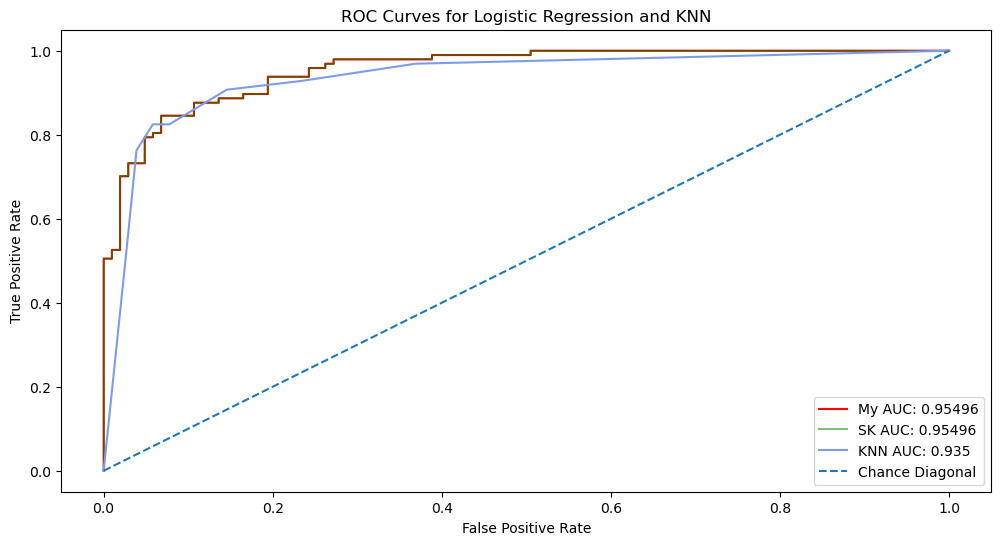

In [ ]:
# auc scores from my implementation and sklearn's implementation for logistic regression and knn

print(f"Logistic Regression AUC from my implementation: {auc_pV_logit_cv:.3f}")

print(f"Logistic Regression AUC from sklearn's implementation: {sk_lg_auc:.3f}")

print(f"KNN AUC from sklearn's implementation: {sk_knn_auc:.3f}")

# plotting the roc curves

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

# plotting the roc curves from my implementation
ax1.plot(roc_pV_logit_cv[:, 1],roc_pV_logit_cv[:, 0], label=f"My AUC: {auc_pV_logit_cv:.5f}", color="red")
ax1.plot(sk_lg_fpr, sk_lg_tpr, label=f"SK AUC: {sk_lg_auc:.5f}", color = 'green', alpha = 0.5)
ax1.plot(sk_knn_fpr, sk_knn_tpr, label=f"KNN AUC: {sk_knn_auc:.3f}", color = '#7c9be9')
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("ROC Curves for Logistic Regression and KNN")
ax1.plot([0, 1], [0, 1], linestyle="--", label="Chance Diagonal")
ax1.legend()


plt.show()

  - What is the purpose of using cross validation for this problem?

 >The purpose of cross validation for this particular problem is to get an overall, aggregated performance metric, as well as some validation of model choice. To explain the two components of this answer, first the question wil be examined. An ROC curve was required from the aggregation of the results of the multiple folds. This meant that model selection was not a requirement. What was a requirement was getting a sense of, however many combinations or assortments of training and test sets were created from the multitude of observations, the overall behavior of the roc curve across the multiple folds. The purpose was to get a security of how the ROC curve would have looked when accounting for the finite size of the data and needing to divide it into multiple folds. Instead of drawing a conclusion from on one training and test set pair, it was decided to do it for the results from 10 pairs, so we added more confidence to our conclusions, especially in terms of choosing the optimal threshold that would maximize the True Positive Rate. In other words, the purpose was performance evaluation. The second part of the answer is model choice, since this is a classification problem. Comparing our model across multiple folds to a KNN model across multiple folds would have also served to validate if the logistic regression model is a good choice for this problem.

  - How do the models compare in terms of performance (both ROC curves and decision boundaries) and which model (logistic regression or KNN) would you select to use on previously unseen data for this problem and why?

  >Based on the initial decision boundaries, both models actually looked equivalent as to how many points were incorrectly misclassified. When considering the ROC curves, it is apparent that the logistic regression model maximizes the true positive rate while keeping a lower false positive rate than the KNN model, at a much earlier point during the threshold evaluation (or comparison) process. This is extremely important, and it defines the reason as to why the logistic regression is better in this case for unseen data. Despite the KNN's advantage in a lower dimensional space, the false positive rate for the KNN model has to peak at 1 for the True positive rate to reach 1 as well. At best, as a happy medium,  one could put a hard stop on the model for the false positive rate of 0.4 and a corresponding true positive rate of almost 1 (maybe 0.9 or 0.8). However, what if the problem was classifying if a patient has an illness? Objectively speaking, the penalties for a false positive in this scenario, a patient classified as sick when he/she is not really sick at all, are severely outweighed by the deficiency of a true positive rate of 90%, where 10% of the time sick patients are misclassified as not sick, delaying medical attention and prevention procedures that can potentially cause death. Consider a logistic regression model, there will be many false positives (although less than the KNN), but the true positive rate will be maximized earlier, so false negatives will be prevented, and patients who are sick will always be correctly classified as sick. The needs of the problem have to call for the right tool, and it is logistic regression in this case. 

# 2

## Digits classification 
**[30 points]**

*An exploration of regularization, imbalanced classes, ROC and PR curves*

The goal of this exercise is to apply your supervised learning skills on a very different dataset: in this case, image data; MNIST: a collection of images of handwritten digits. Your goal is to train a classifier that is able to distinguish the number "3" from all possible numbers and to do so as accurately as possible. You will first explore your data (this should always be your starting point to gain domain knowledge about the problem.). Since the feature space in this problem is 784-dimensional, overfitting is possible. To avoid overfitting you will investigate the impact of regularization on generalization performance (test accuracy) and compare regularized and unregularized logistic regression model test error against other classification techniques such as linear discriminant analysis and random forests and draw conclusions about the best-performing model.

Start by loading your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, using the code provided below. MNIST has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to classify whether or not an example digit is a 3. Your binary classifier should predict $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format (3's are class 1, and all other digits are class 0). 


**(a)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.
- Note that the data are composed of samples of length 784. These represent 28 x 28 images, but have been reshaped for storage convenience. To plot digit examples, you'll need to reshape the data to be 28 x 28 (which can be done with numpy `reshape`).

**(b)** How many examples are present in each class? Show a plot of samples by class (bar plot). What fraction of samples are positive? What issues might this cause?

**(c)** Identify the value of the regularization parameter that optimizes model performance on out-of-sample data. Using a logistic regression classifier, apply lasso regularization and retrain the model and evaluate its performance on the test set over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. Vary the value of C logarithmically from $10^{-4}$ to $10^4$ (and make your x-axes logarithmic in scale) and evaluate it at least 20 different values of C. As you vary the regularization coefficient, Plot the following four quantities (this should result in 4 separate plots)... 
- The number of model parameters that are estimated to be nonzero (in the logistic regression model, one attribute is `coef_`, which gives you access to the model parameters for a trained model)
- The cross entropy loss (which can be evaluated with the Scikit Learn `log_loss` function)
- Area under the ROC curve (AUC)
- The $F_1$-score (assuming a threshold of 0.5 on the predicted confidence scores, that is, scores above 0.5 are predicted as Class 1, otherwise Class 0). Scikit Learn also has a `f1_score` function which may be useful.
-Which value of C seems best for this problem? Please select the closest power of 10. You will use this in the next part of this exercise.

**(d)** Train and test a (1) logistic regression classifier with minimal regularization (using the Scikit Learn package, set penalty='l1', C=1e100 to approximate this), (2) a logistic regression classifier with the best value of the regularization parameter from the last section, (3) a Linear Discriminant Analysis (LDA) Classifier, and (4) a Random Forest (RF) classifier (using default parameters for the LDA and RF classifiers). 
- Compare your classifiers' performance using ROC and Precision Recall (PR) curves. For the ROC curves, all your curves should be plotted on the same set of axes so that you can directly compare them. Please do the same wih the PR curves.
- Plot the line that represents randomly guessing the class (50% of the time a "3", 50% not a "3"). You SHOULD NOT actually create random guesses. Instead, you should think through the theory behind how ROC and PR curves work and plot the appropriate lines. It's a good practice to include these in ROC and PR curve plots as a reference point.
- For PR curves, an excellent resource on how to correctly plot them can be found [here](https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/) (ignore the section on "non-linear interpolation between two points"). This describes how a random classifier is represented in PR curves and demonstrates that it should provide a lower bound on performance.
- When training your logistic regression model, it's recommended that you use solver="liblinear"; otherwise, your results may not converge.
- Describe the performance of the classifiers you compared. Did the regularization of the logistic regression model make much difference here? Which classifier you would select for application to unseen data.

In [ ]:
# Load the MNIST Data
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Set this to True to download the data for the first time and False after the first time 
#   so that you just load the data locally instead
download_data = False

if download_data:
    # Load data from https://www.openml.org/d/554
    X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
    
    # Adjust the labels to be '1' if y==3, and '0' otherwise
    y[y!='3'] = 0
    y[y=='3'] = 1
    y = y.astype('int')
    
    # Divide the data into a training and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=88)
    
    file = open('tmpdata', 'wb')
    pickle.dump((X_train, X_test, y_train, y_test), file)
    file.close()
else:
    file = open('tmpdata', 'rb')
    X_train2, X_test2, y_train2, y_test2 = pickle.load(file)
    file.close()

**ANSWER** 

**(a)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.
- Note that the data are composed of samples of length 784. These represent 28 x 28 images, but have been reshaped for storage convenience. To plot digit examples, you'll need to reshape the data to be 28 x 28 (which can be done with numpy `reshape`).

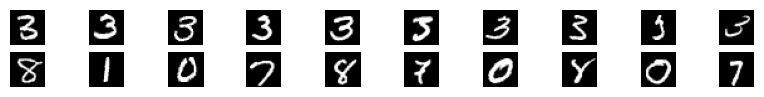

In [ ]:
# plot 10 examples of the training data
fig, ax = plt.subplots(2, 10, figsize=(10, 1))
pos_counter = 0

i = 0
while pos_counter < 10:
    if y_train2[i] == 1:
        ax[0,pos_counter].imshow(X_train2[i].reshape((28,28)), cmap='gray')
        ax[0,pos_counter].axis('off')
        pos_counter += 1
    i += 1

neg_counter = 0
j = 0
while neg_counter < 10:
    if y_train2[j] == 0:
        ax[1,neg_counter].imshow(X_train2[j].reshape((28,28)), cmap='gray')
        ax[1,neg_counter].axis('off')
        neg_counter += 1
    j += 1


ax[0,0].set_ylabel('HERE')

plt.show()




**(b)** How many examples are present in each class? Show a plot of samples by class (bar plot). What fraction of samples are positive? What issues might this cause?


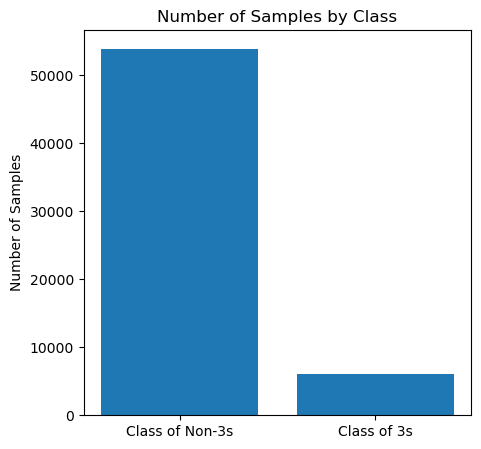

In [ ]:
# bar plot number of examples of each class in the training data
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.bar([0,1], [np.sum(y_train2==0), np.sum(y_train2==1)])
ax.set_xticks([0,1])
ax.set_xticklabels(['Class of Non-3s', 'Class of 3s'])
ax.set_ylabel('Number of Samples')
ax.set_title('Number of Samples by Class')
plt.show()


>The classes are heavily imbalanced. This can definitely hurt the predictive power of the models.

**(c)** Identify the value of the regularization parameter that optimizes model performance on out-of-sample data. Using a logistic regression classifier, apply lasso regularization and retrain the model and evaluate its performance on the test set over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. Vary the value of C logarithmically from $10^{-4}$ to $10^4$ (and make your x-axes logarithmic in scale) and evaluate it at least 20 different values of C. As you vary the regularization coefficient, Plot the following four quantities (this should result in 4 separate plots)... 
- The number of model parameters that are estimated to be nonzero (in the logistic regression model, one attribute is `coef_`, which gives you access to the model parameters for a trained model)
- The cross entropy loss (which can be evaluated with the Scikit Learn `log_loss` function)
- Area under the ROC curve (AUC)
- The $F_1$-score (assuming a threshold of 0.5 on the predicted confidence scores, that is, scores above 0.5 are predicted as Class 1, otherwise Class 0). Scikit Learn also has a `f1_score` function which may be useful.
- Which value of C seems best for this problem? Please select the closest power of 10. You will use this in the next part of this exercise.

In [ ]:
# apply a logistic regression model to the data with an L1 penalty with different values of C
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# list of 20 different values of C to try ranging from 10^-4 to 10^4
C_list = np.logspace(-4, 4, 20)

# list to store the accuracy, loss, number of non-zero coefficients, and AUC for each value of C
accuracy_list = []
loss_list = []
num_nonzero_coefs_list = []
auc_list = []
f1_list = []

# loop through different values of C to populate the lists

for value in C_list:

    # a logistic regression model with an L1 penalty
    logit_l1 = LogisticRegression(penalty='l1', C=value, solver='liblinear')

    # Fitting the model
    logit_l1.fit(X_train2, y_train2)

    y_pred = logit_l1.predict(X_test2)

    accuracy = accuracy_score(y_test2, y_pred)

    loss = log_loss(y_test2, y_pred)

    num_nonzero_coefs = np.count_nonzero(logit_l1.coef_)

    auc = roc_auc_score(y_test2, logit_l1.predict_proba(X_test2)[:,1])

    f1 = f1_score(y_test2, y_pred)

    # Append the values to the lists
    accuracy_list.append(accuracy)
    loss_list.append(loss)
    num_nonzero_coefs_list.append(num_nonzero_coefs)
    auc_list.append(auc)
    f1_list.append(f1)









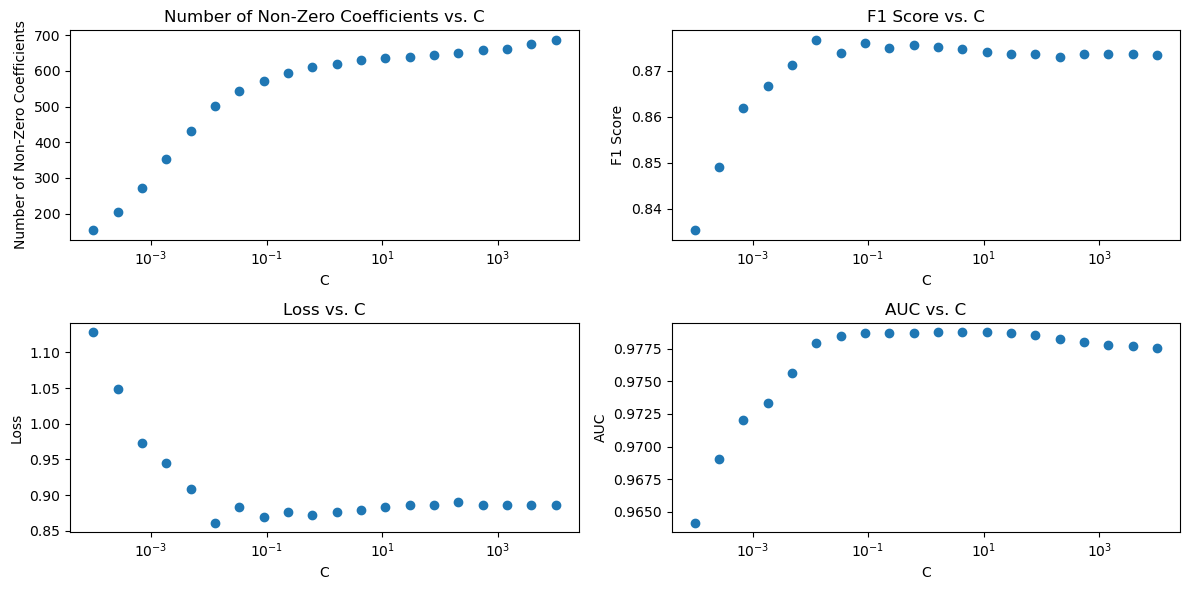

The best value for C is [0.01274275]


In [ ]:



fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# reshaping the lists to shape (20,1) so that they can be plotted
accuracy = np.array(accuracy_list).copy().reshape((20,1))
loss = np.array(loss_list).copy().reshape((20,1))
num_nonzero_coefs = np.array(num_nonzero_coefs_list).copy().reshape((20,1))
auc = np.array(auc_list).copy().reshape((20,1))
f1 = np.array(f1_list).copy().reshape((20,1))
C_list = np.array(C_list).copy().reshape((20,1))

# #plot line plot of the accuracy, loss, number of non-zero coefficients, and AUC vs. C
# ax1.plot(C_list, accuracy, label='Accuracy')
# ax1.plot(C_list, loss, label='Loss')


# plot the number of non-zero coefficients vs. C
ax1.plot(C_list, num_nonzero_coefs, 'o', label = 'Number of Non-Zero Coefficients by C')
ax1.set_xlabel('C')
ax1.set_ylabel('Number of Non-Zero Coefficients')
ax1.set_title('Number of Non-Zero Coefficients vs. C')
ax1.set_xscale('log')
# ax1.set_xlim([-1, 10])

# plot the accuracy vs. C
ax2.plot(C_list, f1_list, 'o', label = 'F1 Score by C')
ax2.set_xlabel('C')
ax2.set_ylabel('F1 Score')
ax2.set_title('F1 Score vs. C')
ax2.set_xscale('log')


# plot the loss vs. C
ax3.plot(C_list, loss, 'o', label = 'Loss by C')
ax3.set_xlabel('C')
ax3.set_ylabel('Loss')
ax3.set_title('Loss vs. C')
ax3.set_xscale('log')

# plot the AUC vs. C
ax4.plot(C_list, auc, 'o', label = 'AUC by C')
ax4.set_xlabel('C')
ax4.set_ylabel('AUC')
ax4.set_title('AUC vs. C')
ax4.set_xscale('log')



plt.tight_layout()

plt.show()

print(f"The best value for C is {C_list[5]:.4f}")

- Which value of C seems best for this problem? Please select the closest power of 10. You will use this in the next part of this exercise.

> The regularization parameter definitely exerted its influences over all parts of the model. The priority of the problem is what should decide the choice for parameter C. For example, if the problem asked for specifically maximizing the F1-Score, that would be the choice of C. However, for this problem, the approach taken will try to choose the overall best for all cases, since the best C values are not the same for each metric. First of all, the AUC values are already very high, as well as the F1-Scores, which means that those two metrics are the land of diminishing returns. The lowest values of C are already very excellent. The evaluation becomes considerably complicated when optimizing for loss, as the ideal C is likely to be found near $10^{-2}$ and $10^{-1}$. For the number of coefficients, the best values of C are found between $10^{-3}$ and $10^{-4}$. Here comes the decisive factor. Which is the simpler model to implement? If following Occam's Razor, the parameter of choice would likely be $10^{-3}$, as the number of coefficients hovers around 300. When the value of C is $10^{-2}$, the number of coefficients is around 500. If one can afford to sacrifice a little on the overall loss, then $10^{-3}$ would be the right value for C.

**(d)** Train and test a (1) logistic regression classifier with minimal regularization (using the Scikit Learn package, set penalty='l1', C=1e100 to approximate this), (2) a logistic regression classifier with the best value of the regularization parameter from the last section, (3) a Linear Discriminant Analysis (LDA) Classifier, and (4) a Random Forest (RF) classifier (using default parameters for the LDA and RF classifiers). 
- Compare your classifiers' performance using ROC and Precision Recall (PR) curves. For the ROC curves, all your curves should be plotted on the same set of axes so that you can directly compare them. Please do the same wih the PR curves.
- Plot the line that represents randomly guessing the class (50% of the time a "3", 50% not a "3"). You SHOULD NOT actually create random guesses. Instead, you should think through the theory behind how ROC and PR curves work and plot the appropriate lines. It's a good practice to include these in ROC and PR curve plots as a reference point.
- For PR curves, an excellent resource on how to correctly plot them can be found [here](https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/) (ignore the section on "non-linear interpolation between two points"). This describes how a random classifier is represented in PR curves and demonstrates that it should provide a lower bound on performance.
- When training your logistic regression model, it's recommended that you use solver="liblinear"; otherwise, your results may not converge.
- Describe the performance of the classifiers you compared. Did the regularization of the logistic regression model make much difference here? Which classifier you would select for application to unseen data.

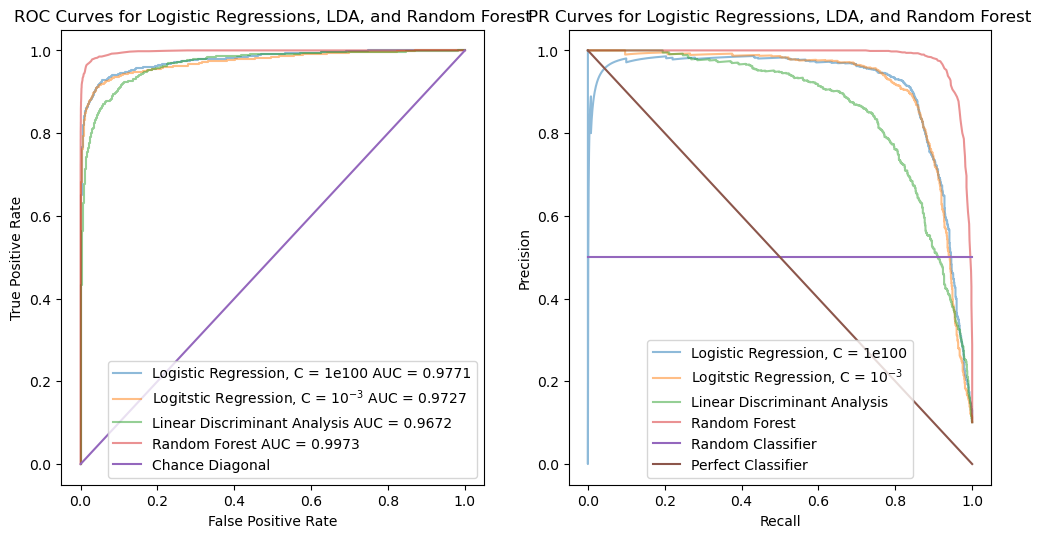

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve


fig = plt.figure(figsize=(12, 13))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

# Fitting the models

logit_d = LogisticRegression(C=1e100, penalty='l1', solver='liblinear')
logit_d.fit(X_train2, y_train2)

logit_d_my_C = LogisticRegression(C=10**-3, penalty='l1', solver='liblinear')
logit_d_my_C.fit(X_train2, y_train2)


lda = LinearDiscriminantAnalysis()
lda.fit(X_train2, y_train2)


rf = RandomForestClassifier()
rf.fit(X_train2, y_train2)

j = 0
string_labels = ['Logistic Regression, C = 1e100', 'Logitstic Regression, C = $10^{-3}$', 'Linear Discriminant Analysis', 'Random Forest']

for i in [logit_d, logit_d_my_C, lda, rf]:

    model_auc = roc_auc_score(y_test2, i.predict_proba(X_test2)[:,1])
    model_fpr, model_tpr, model_thresholds = roc_curve(y_test2, i.predict_proba(X_test2)[:,1])
    model_precision, model_recall, model_thresholds = precision_recall_curve(y_test2, i.predict_proba(X_test2)[:,1])

    ax1.plot(model_fpr, model_tpr, label=string_labels[j]+f' AUC = {model_auc:.4f}', alpha = 0.5)
    ax2.plot(model_recall, model_precision, label=string_labels[j], alpha = 0.5)

    j += 1

# Chance Diagonal
ax1.plot([0, 1], [0, 1], label='Chance Diagonal')
ax1.legend()
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves for Logistic Regressions, LDA, and Random Forest')


# Plot the PR curve for a random guess and perfect guess
ax2.plot([0, 1], [0.5, 0.5], label='Random Classifier')
ax2.plot([0, 1], [1, 0], label='Perfect Classifier')
ax2.legend()
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('PR Curves for Logistic Regressions, LDA, and Random Forest')


# Display the plot
plt.show()





- Describe the performance of the classifiers you compared. Did the regularization of the logistic regression model make much difference here? Which classifier you would select for application to unseen data.

> As for the logistic regression models, the regularization showed minimal impact for the ROC curves, where my chosen regularized model performed slightly better than its counterpart. As for the PR curves, the decline for my model was a bit sharper on the PR curve in comparison to the other logistic regression model, as it is able to hold a higher precision as recall declines for a short period. Regularization actually made a small, but meaningful impact specifically for the PR curves in regards to this problem, not the ROC curves because the models have to maximize the false positive rate to hit a higher true positive rate.  The Linear Discriminant Analysis model underperformed in both curves. One wonders if the imbalance of the classes may have been responsible for severly impacting the performance of the logistic regression models and the LDA model. The best performing model was the Random Forest model. It maximized the true positive rate with a small false positive rate very early in the roc curve, and it retained a very high precision as the recall was being decreased. Also, this model was robust against the class imbalance in this problem. It is the ideal model for this problem, and it taught me the importance of having a hypothesis set to test multiple models because one never truly knows what tool is right for the job unless all tools are tested. 